<a href="https://colab.research.google.com/github/cxbxmxcx/GenReality/blob/master/GEN_3_learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split

import numpy  as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [2]:
def function(X):
  return X * X + 5.

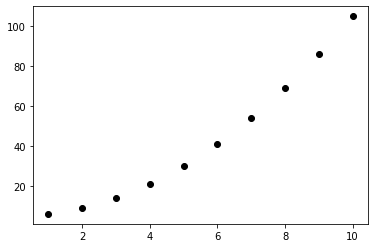

In [3]:
X = np.array([[1.],[2.],[3.],[4.],[5.],[6.],[7.],[8.],[9.],[10.]])
y = function(X)
inputs = X.shape[1]
y = y.reshape(-1, 1)
plt.plot(X, y, 'o', color='black')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
num_train = X_train.shape[0]
X_train[:2], y_train[:2]
num_train

8

In [5]:
torch.set_default_dtype(torch.float64)
net = nn.Sequential(
    nn.Linear(inputs, 50, bias = True), nn.ReLU(),
    nn.Linear(50, 50, bias = True), nn.ReLU(),
    nn.Linear(50, 50, bias = True), nn.Sigmoid(),
    nn.Linear(50, 1)
)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = .001)

In [6]:
num_epochs = 8000
y_train_t = torch.from_numpy(y_train).clone().reshape(-1, 1)
x_train_t = torch.from_numpy(X_train).clone()
y_test_t = torch.from_numpy(y_test).clone().reshape(-1, 1)
x_test_t = torch.from_numpy(X_test).clone()
history = []

In [7]:
for i in range(num_epochs):
    y_pred = net(x_train_t)
    loss = loss_fn(y_train_t,y_pred)
    history.append(loss.data)    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()  
    test_loss = loss_fn(y_test_t,net(x_test_t))  
    if i > 0 and i % 100 == 0:
        print(f'Epoch {i}, loss = {loss:.3f}, test loss {test_loss:.3f}')

Epoch 100, loss = 2326.371, test loss 3305.982
Epoch 200, loss = 2099.660, test loss 3027.314
Epoch 300, loss = 1894.562, test loss 2776.022
Epoch 400, loss = 1718.154, test loss 2559.554
Epoch 500, loss = 1561.272, test loss 2366.447
Epoch 600, loss = 1422.444, test loss 2194.331
Epoch 700, loss = 1299.460, test loss 2022.774
Epoch 800, loss = 1188.404, test loss 1869.735
Epoch 900, loss = 1087.801, test loss 1728.369
Epoch 1000, loss = 997.357, test loss 1594.805
Epoch 1100, loss = 916.060, test loss 1470.571
Epoch 1200, loss = 841.451, test loss 1354.637
Epoch 1300, loss = 773.234, test loss 1246.434
Epoch 1400, loss = 711.204, test loss 1145.769
Epoch 1500, loss = 655.072, test loss 1052.452
Epoch 1600, loss = 604.466, test loss 966.158
Epoch 1700, loss = 557.530, test loss 885.324
Epoch 1800, loss = 514.139, test loss 809.658
Epoch 1900, loss = 474.177, test loss 739.101
Epoch 2000, loss = 437.540, test loss 673.455
Epoch 2100, loss = 404.115, test loss 612.600
Epoch 2200, loss = 

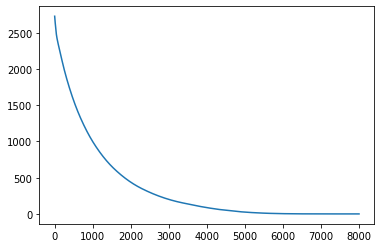

In [8]:
plt.plot(history)

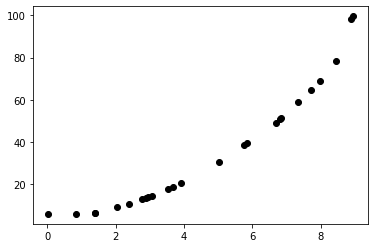

In [9]:
X_a = torch.rand(25,1).clone() * 9
y_a = net(X_a)
y_a = y_a.detach().numpy()
plt.plot(X_a, y_a, 'o', color='black')